# 1. Business Needs

Airbnb is an online exchange market that links people who want to rent out their homes with people who are looking for accommodations in specific locales.
Airbnb offers people an easy, relatively more relaxing way to earn some profit from their houses.
Guests often find Airbnb has more competitive price, and more comfortable than hotels.
Airbnb makes its income by charging a service fee for each booking.
Cons of using this service include not getting what it is offered, and, for hosts, renting your place to someone you haven’t had the chance to meet yet.
There are millions of transactions listed that generated a lot of data. In this project we will analyse a variety of scenarios to provide insights for business decisions.

Dataset used:
    - calendar.csv
    - listings.csv
Details needed:
    - Most popular neighbourhood
    - Busiest time of the year
    - Price Prediction
    - Reviews Prediction


# 2. Check the Data Available

This dataset is part of Airbnb Inside, and the data source can be found here. (https://www.kaggle.com/airbnb/seattle/data)

There are 3 subsets in the dataset:

- calendar.csv contains the pricing for each listing id by dates.
- listings.csv provides a detailed description of each listing id, such as host and review scores.
- reviews.csv gives detailed reviews per listing id.


To understand the data first we need to import the data and the libraries needed to develop our studies

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline



In [49]:
calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')
reviews = pd.read_csv('./reviews.csv')

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [15]:
# check the columns and rows per da
def total_count(df):
    '''
    INPUT:
    df - the pandas dataframe you want to search

    OUTPUT:
    cols - number the columns from dateframe
    rows - number of rows from dataframe
    '''
    return " has {} rows and {} columns ".format(df.shape[0], df.shape[1])

In [16]:
print ("listings"+total_count(listings))
print ("reviews"+total_count(reviews))
print ("calendar"+total_count(calendar))

listings has 3818 rows and 92 columns 
reviews has 84849 rows and 6 columns 
calendar has 1393570 rows and 4 columns 


# 3. Organise the Data

Prepare the calendar dataframe to 3 new columns with the month, month_year and year

In [87]:
# month, year, month_year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')

Convert listing id as string

In [88]:
# listing_id to str
calendar['listing_id'] = calendar['listing_id'].astype(str)

In [20]:
# convert the price to float 
def price_datatype(col):
    '''INPUT:
        col - the price column to change the data type.
    OUTUT:
        col - converted column to float datatype.'''
        
    col = col.apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
    return col



In [89]:
# convert calendar price column to float datatype
calendar['price'] = price_datatype(calendar['price'])

In [22]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
listing_id    1393570 non-null object
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null float64
month         1393570 non-null int64
year          1393570 non-null int64
month_year    1393570 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 74.4+ MB


### Prepare listings dataframe

In [23]:
# convert price, weekly price and monthly price to float datatype using price_datatype function
listings['price'] = price_datatype(listings['price'])
listings['weekly_price'] = price_datatype(listings['weekly_price'])
listings['monthly_price'] = price_datatype(listings['monthly_price'])

In [24]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### Function for missing values.
Replace the missing values in numeric variables by the mean. 
Use get dummies to encode NaN values as their own dummy coded column using the dummy na option for categorical variables.

In [29]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    there are 2 steps to clean the data:   
    1. For each numeric variable in X, fill the column with the mean value of the column for the missing values.
    2. Create dummy columns for all the categorical variables in X, drop the original columns
    '''    
        # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X=df      
    return X

In [75]:
#clean data fill na with mean and dummy var in listing
clean_data(listings)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,last_review_2015-12-30,last_review_2015-12-31,last_review_2016-01-01,last_review_2016-01-02,last_review_2016-01-03,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,0,0,0,0,0,0,0,1,1,1
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,0,0,0,0,0,0,0,1,0,0
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,0,0,0,0,0,0,0,1,0,0
5,5956968,20160104002432,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,1909058,20160104002432,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
7,856550,20160104002432,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,...,0,0,1,0,0,0,0,1,1,1
8,4948745,20160104002432,2166277,1.0,1.0,47.632410,-122.357216,2,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,2493658,20160104002432,5177328,6.0,6.0,47.637492,-122.366889,4,1.0,1.0,...,0,0,0,0,0,0,0,1,1,1


In [28]:
# rename id by listing_id as per calendar df
listings.rename(columns={'id': 'listing_id'}, inplace=True)

### Function to clean the prices

In [79]:
def clean_price(col):
    '''INPUT:
        col - the price-related column you want to clean.
    OUTUT:
        col - a column which has the same column name and is converted with a correct datatype.'''
        
    col = col.apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
    return col

# 4. Modelling Techniques

### 1. Airbnb wants to know the top 10 neigbourhoods with more properties listed

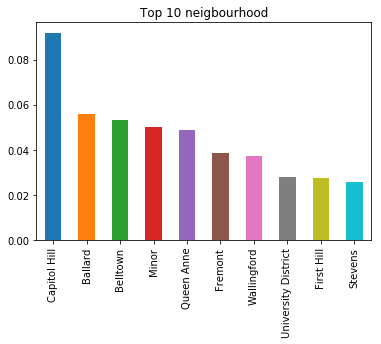

In [31]:
neighbourhood_vals =listings['neighbourhood'].value_counts().nlargest(10)#Provide a pandas series of the counts for each neighboourhood 

# The below should be a bar chart of the proportion of listing properties in the top 10 neighboourhood with largest properties listed
# is set up correctly.

(neighbourhood_vals/listings.shape[0]).plot(kind="bar", legend=None);
plt.title("Top 10 neigbourhood");

it seems that the most pupular neighbourhood is Capitol Hill. Number of properties rate is almost double to the next neighbourhood in the list.


A deeper analysis in the review scores location shows that the Capitol Hill is one of the highest in the ranking.

In [44]:
list_top10=list(neighbourhood_vals.index)
df=pd.DataFrame(listings.query("neighbourhood==@list_top10").groupby(['neighbourhood']).mean()['review_scores_location'])
df.head()

,review_scores_location
neighbourhood,
Ballard,9.738345
Belltown,9.786256
Capitol Hill,9.805070
First Hill,9.717634
Fremont,9.806731


### 2. Reviews Prediction Model

Step followed:
    - calculate the proportion of listed properties in the dataset reported a review
    - Clean the rows associated with nan values
    - Split data into training and test data
    - Predict the values using the test 

In [50]:
# 1. What proportion of listed properties in the dataset reported a review?
prop_review = 1 - listings.isnull()['review_scores_rating'].mean()# Proportion of individuals in the dataset with review_score_rating reported
prop_review

0.8305395495023573

In [51]:
clean_data(listings)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,last_review_2015-12-30,last_review_2015-12-31,last_review_2016-01-01,last_review_2016-01-02,last_review_2016-01-03,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,0,0,0,0,0,0,0,1,1,1
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,0,0,0,0,0,0,0,1,0,0
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,0,0,0,0,0,0,0,1,0,0
5,5956968,20160104002432,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,1909058,20160104002432,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
7,856550,20160104002432,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,...,0,0,1,0,0,0,0,1,1,1
8,4948745,20160104002432,2166277,1.0,1.0,47.632410,-122.357216,2,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,2493658,20160104002432,5177328,6.0,6.0,47.637492,-122.366889,4,1.0,1.0,...,0,0,0,0,0,0,0,1,1,1


In [52]:
#Subset to only quantitative vars
num_vars = listings[['review_scores_rating','review_scores_value','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication'
               ,'review_scores_location','review_scores_value']]


num_vars.head()


,review_scores_rating,review_scores_value,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
1,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3,94.539262,9.452245,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
4,92.000000,9.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000


In [54]:
# Using num_vars, create X to be a dataframe (matrix) of all of the numeric feature variables. Then, let it be the response vector you would like to predict (Salary). Run the cell below once you have split the data, and use the result of the code to assign the correct letter to question3_solution.
X_2 = num_vars[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value']]
y_2 = num_vars['review_scores_rating']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")

In [66]:
y_train_predict

array([95.93616247, 93.47457605, 98.39774888, ..., 94.55847061,
       78.01813955, 82.42199082])

In [68]:
# Now, use lm_2_model to predict the y_2_test response values, and obtain an r-squared value for how well the predicted values compare to the actual test values.
y_test_preds = lm_2_model.predict(X_2_test)# Predictions here
r2_test = r2_score(y_2_test, y_test_preds) # Rsquared here

# Print r2 to see result

print('r2 score for a worse model is', r2_test)

r2 score for a worse model is 0.686604236249412


### 3. Price Prediction Model

We need price related columns to find the correlection and predict the price.

In [128]:
price_related_colms = [
            'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating',
            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value', 'reviews_per_month', 
            'accommodates', 'guests_included', 'minimum_nights', 
            'maximum_nights',  'price']# Official & Possible ML features
# clean the prices values
listings['price'] = clean_price(listings['price'])
listings['weekly_price'] = clean_price(listings['weekly_price'])
listings['monthly_price'] = clean_price(listings['monthly_price'])


#### Headmap

Shows the relationship bewtween every two related metrics. The pandas method used is .corr()
Here, accommodates, bathrooms, bedrooms, beds, security_deposit, cleaning_fee, guests_included, extra_people have relatively higher correlation coefficient than other features with price

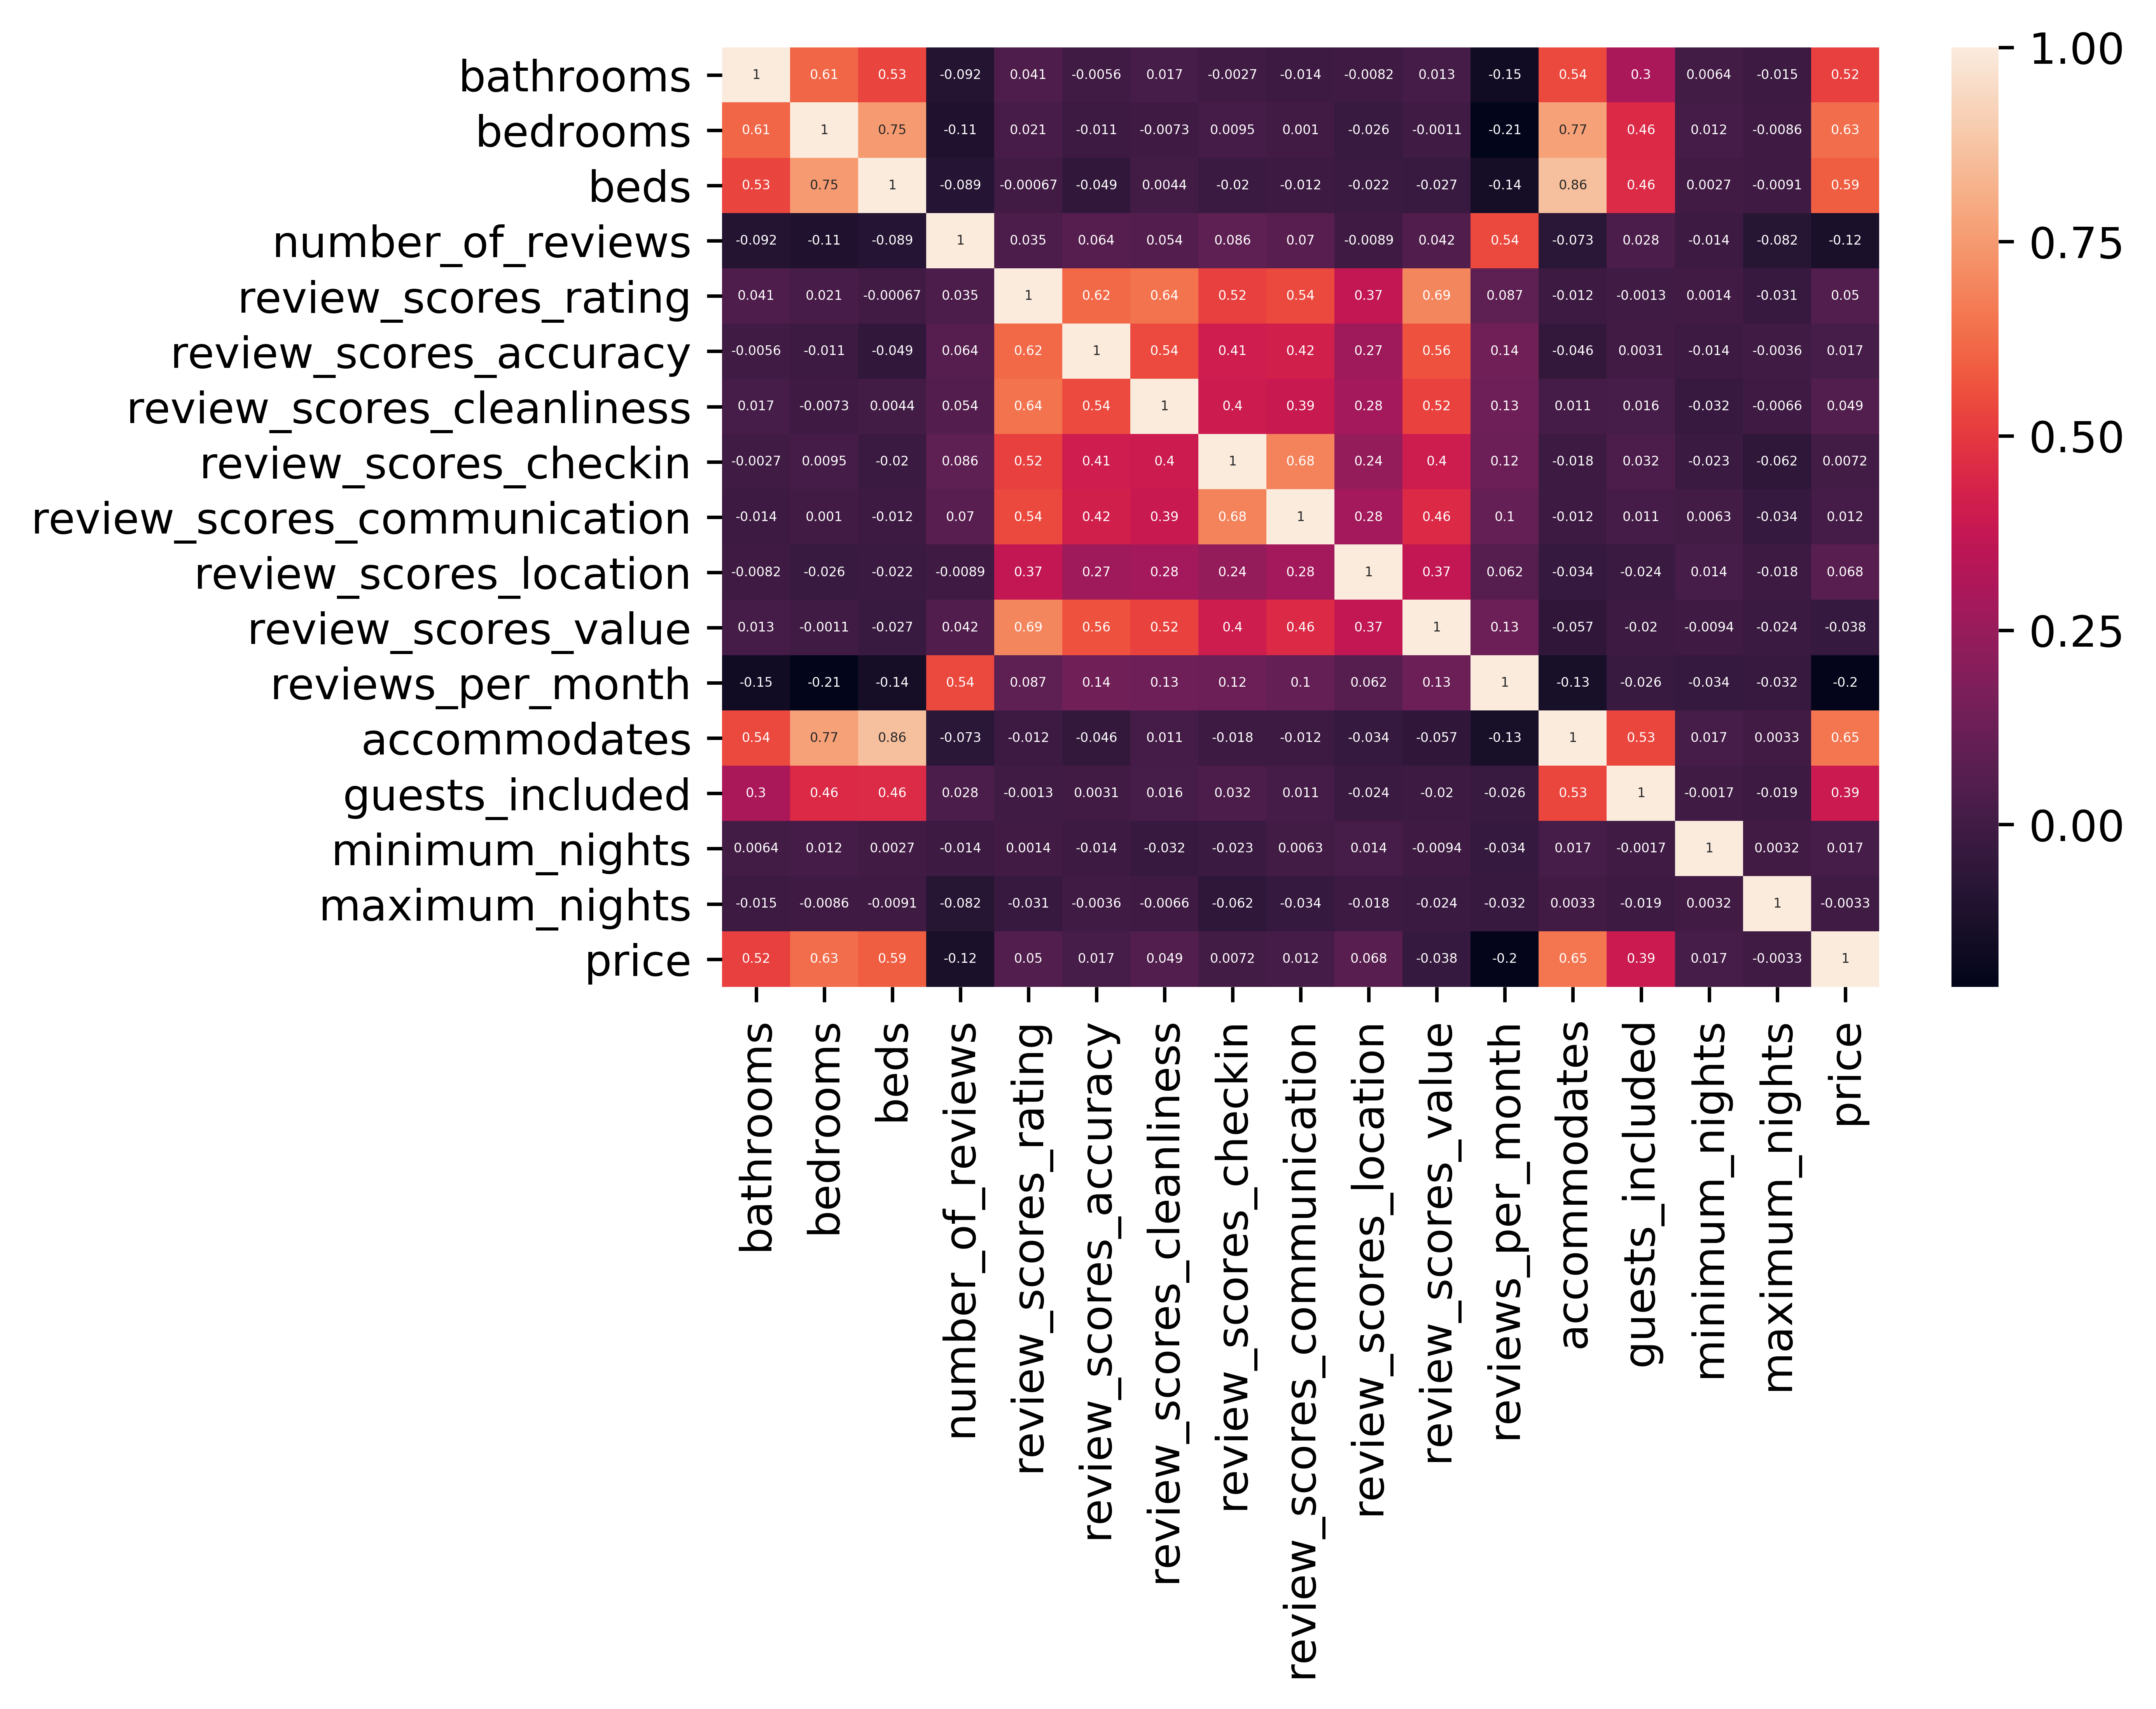

In [121]:
plt.figure(dpi=800)
sns.heatmap(listings[price_related_colms].corr(), cmap="rocket", annot=True, annot_kws={"fontsize": 3});

Predict Salary based on all of the other quantitative variables in the dataset. You can use the template above to assist in fitting your model:

    -Split the data into explanatory and response variables
    -Split the data into train and test (using seed of 42 and test_size of .30 as above)
    -Instantiate the linear model using normalized data
    -Fit the model on the training data
    -Predict using the test data
    -Compute a score for your model fit on all the data, and show how many rows you predicted for use 
    the tests to assure you completed the steps correctly.

In [129]:
#Split into explanatory and response variables
X = listings[price_related_colms]
X.drop(['price'], inplace=True, axis=1)
y = listings['price']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
bathrooms                      3818 non-null float64
bedrooms                       3818 non-null float64
beds                           3818 non-null float64
number_of_reviews              3818 non-null int64
review_scores_rating           3818 non-null float64
review_scores_accuracy         3818 non-null float64
review_scores_cleanliness      3818 non-null float64
review_scores_checkin          3818 non-null float64
review_scores_communication    3818 non-null float64
review_scores_location         3818 non-null float64
review_scores_value            3818 non-null float64
reviews_per_month              3818 non-null float64
accommodates                   3818 non-null int64
guests_included                3818 non-null int64
minimum_nights                 3818 non-null int64
maximum_nights                 3818 non-null int64
dtypes: float64(11), int64(5)
memory usage: 477.3 KB


In [134]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)



'The r-squared score for your model was 0.5207864308338266 on 1146 values.'

In [136]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

lm_model.coef_
print('test_score: ',test_score)
print('train_score: ', train_score)
if abs(test_score/train_score) > 0.8:
    print('The model is not overfitted.')
else:
    print('Need to improve the model.')
print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)),'\n')


test_score:  0.5207864308338266
train_score:  0.49919347506731804
The model is not overfitted.
The r-squared score for the model is 0.5207864308338266 on 1146 values. 



In [163]:
### Now we can predict on everything, but our predictions are even worse!

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,55.0,55.694654,-0.694654
1,82.0,152.429158,-70.429158
2,68.0,88.492304,-20.492304
3,58.0,86.478067,-28.478067
4,130.0,96.482449,33.517551


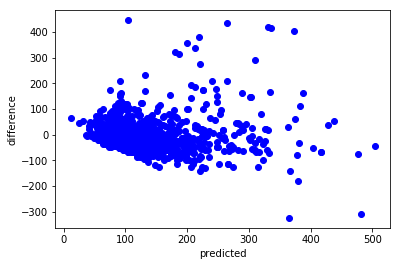

In [164]:
### We can plot how far our predictions are from the actual values compaired to the
### predicted values - you can see that it isn't uncommon for us to miss prices by
### 400 and the overpredictions tend to be much worse than the underpredictions
### THere also appears to be a trend where our differences decrease as the predicted
### values increase on the test data.

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

#### Busiest time of the year

It seems that life in Seattle is pretty much busy the whole year. There are 2 spikes in March and December. The behaviour can be expected as there are public holidays and Christmas, and people tend to travel so the number of properties available increase. 



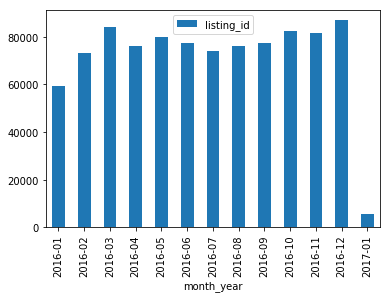

In [90]:
df=pd.DataFrame(calendar.query("available =='t'").groupby(['month_year']).count()['listing_id'])
df.head()

df.plot.bar();

The graph below shows that the highest prices are falling in the summer months (June, July and August). The strategy for Airbnb hosts tends to decrease the prices when the number of guests are higher.

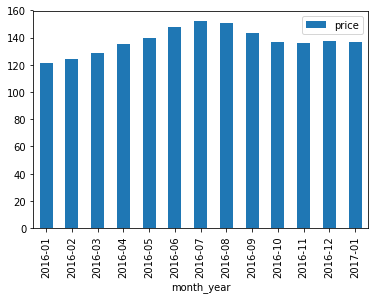

In [91]:
df2=pd.DataFrame(calendar.query("available =='t'").groupby(['month_year']).mean()['price'])
df2.head()

df2.plot.bar();